In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
X = data[['Annual Income (k$)','Spending Score (1-100)']].values
X.shape

(200, 2)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## KMeans

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X_scaled)

labels = km.labels_
labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [11]:
km.cluster_centers_

array([[-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

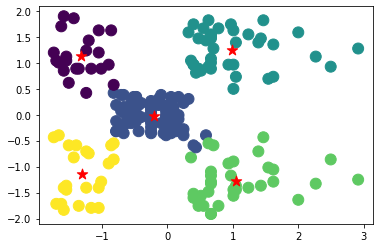

In [12]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels,s=120)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='red',s=120)
plt.show()

## DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
cluster = DBSCAN(eps=0.35,min_samples=3)
cluster.fit(X_scaled)

cluster.labels_

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  1,  2,  1,
        2,  1,  2,  1,  4,  1,  4,  1,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5,  4,  5,  4,  5,  6,  5,  6,  5,  4,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,
        5,  6,  5,  6,  5,  6,  5,  4,  5,  6,  5,  6,  5,  6,  5,  6,  5,
        6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6,  5,  6, -1,  6,
       -1,  6,  5,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [14]:
from collections import Counter
print(Counter(cluster.labels_))

Counter({4: 89, 5: 32, 6: 28, 1: 18, 2: 12, -1: 11, 0: 7, 3: 3})


In [15]:
df = pd.DataFrame(X_scaled)   

CLUSTERS = df[cluster.labels_ != -1]

OUTLIERS = df[cluster.labels_ == -1]     

In [16]:
colors = cluster.labels_

color_cluster = colors[colors != -1]

color_outlier = 'red'

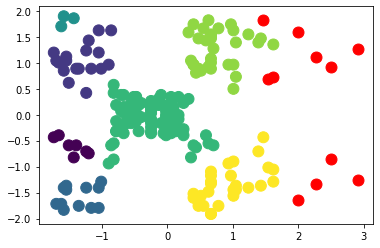

In [17]:
plt.scatter(CLUSTERS[0],CLUSTERS[1],c=color_cluster,s=120)
plt.scatter(OUTLIERS[0],OUTLIERS[1],c=color_outlier,s=120)
plt.show()